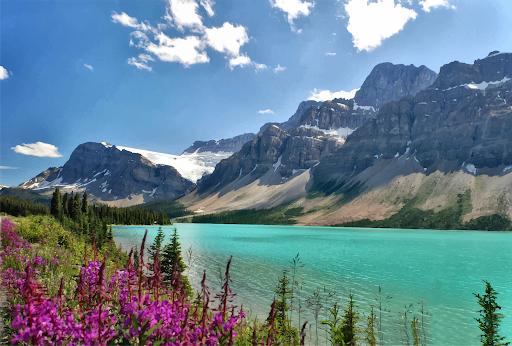

In [35]:
from PIL import Image


def get_bayer_colour(x, y):
    # Should return 'R', 'B', 'G1' or 'G2'
    # Pattern channels 
    # R  G1 R  G1 R  G1
    # G2 B  G2 B  G2 B
    # R  G1 R  G1 R G1
    # G2 B  G2 B  G2 B
    # R  G1 R  G1 R G1
    # G2 B  G2 B  G2 B

    if y % 2 == 0:
        return 'G1' if x % 2 == 0 else 'B'
    else:
        return 'R' if x % 2 == 0 else 'G2'




original_image = Image.open("landscape.png")
original_image


PNG (512, 346) RGBA
None (512, 346) RGB


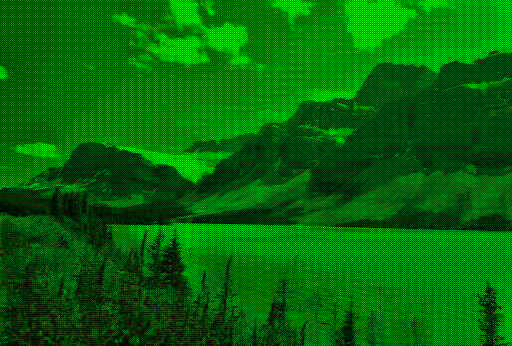

In [36]:

def mosaic(image):
    print(image.format, image.size, image.mode)
    w, h = image.size
    mosaic_image = Image.new('RGB', image.size)
    print(mosaic_image.format, mosaic_image.size, mosaic_image.mode)
    original_pixels = image.load()
    mosaic_pixels = mosaic_image.load()

    for y in range(h):
        for x in range(w):
            r, g, b, a = original_pixels[x, y]
            mosaic_pixels[x, y] = 0,0,0
            bayer_colour = get_bayer_colour(x, y)
            if bayer_colour in ['G1', 'G2']:
                mosaic_pixels[x, y] = 0, g, 0
            elif bayer_colour == 'R':
                mosaic_pixels[x, y] = r, 0, 0
            elif bayer_colour == 'B':
                mosaic_pixels[x, y] = 0, 0, b
    return mosaic_image

mosaic_image = mosaic(original_image)
mosaic_image


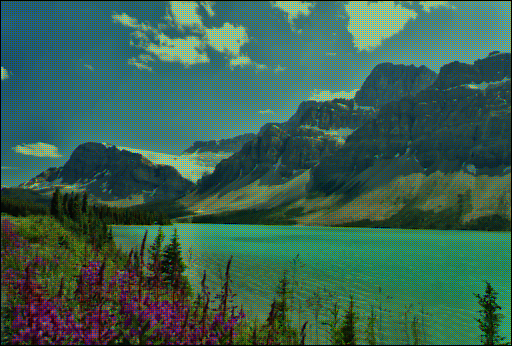

In [ ]:
def averageAboveAndBelow(mosaic_pixels, x, y, w, h, channel):
    if y == 0:
        return mosaic_pixels[x, y+1][channel]
    elif y > 0 and y < h-1:
        return (mosaic_pixels[x, y-1] + mosaic_pixels[x, y+1])[channel]//2
    elif y == h-1:
        return mosaic_pixels[x, y-1][channel]
    else:
        return mosaic_pixels[x,y][channel]
        

def averageLeftAndRight(mosaic_pixels, x, y, w, h, channel):
    if x == 0:
        return mosaic_pixels[x+1, y][channel]
    elif x > 0 and x < w - 1:
        return (mosaic_pixels[x-1, y] + mosaic_pixels[x+1, y])[channel]//2
    elif x == w-1:
        return mosaic_pixels[x-1, y][channel]
    else:
        return mosaic_pixels[x, y][channel]


def demosaic(image):
    w, h = image.size
    demosaic_image = Image.new('RGB', image.size)
    mosaic_pixels = image.load()
    demosaic_pixels = demosaic_image.load()

    for y in range(1, h-1):
        for x in range(1, w-1):
            r, g, b = mosaic_pixels[x, y]
            bayer_colour = get_bayer_colour(x, y)
            
            if bayer_colour == 'G1':
                r = averageAboveAndBelow(mosaic_pixels, x, y, w, h, 0)
                b = averageLeftAndRight(mosaic_pixels, x, y, w, h, 2)
            elif bayer_colour == 'G2':
                r = averageLeftAndRight(mosaic_pixels, x, y, w, h, 0)
                b = averageAboveAndBelow(mosaic_pixels, x, y, w, h, 2)
            elif bayer_colour == 'R':
                g = (averageAboveAndBelow(mosaic_pixels, x, y, w, h, 1) + averageLeftAndRight(mosaic_pixels, x, y, w, h, 1))//2
                b = (averageAboveAndBelow(mosaic_pixels, x-1, y, w, h, 2) + averageLeftAndRight(mosaic_pixels, x+1, y, w, h, 2))//2
            elif bayer_colour == 'B':
                g = (averageAboveAndBelow(mosaic_pixels, x, y, w, h, 1) + averageLeftAndRight(mosaic_pixels, x, y, w, h, 1))//2
                r = (averageAboveAndBelow(mosaic_pixels, x-1, y, w, h, 0) + averageLeftAndRight(mosaic_pixels, x+1, y, w, h, 0))//2

            demosaic_pixels[x, y] = r, g, b
    return demosaic_image

demosaiced_image = demosaic(mosaic_image)
demosaiced_image

In [21]:
original_image.show()
mosaic_image.show()
demosaiced_image.show()